In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 1yS0u28eBkZKsJG20r9Apj4-V4TMfIMnA

Downloading...
From: https://drive.google.com/uc?id=1yS0u28eBkZKsJG20r9Apj4-V4TMfIMnA
To: /content/walmart_data.txt
100% 23.0M/23.0M [00:00<00:00, 54.1MB/s]


In [ ]:
data=pd.read_csv("walmart_data.txt")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# checking out the numerical columns
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## **Usual Data Aalysis**

### **1. Checking data types of columns**

In [ ]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

### **2. Checking the number of rows and columns**

In [ ]:
data.shape

(550068, 10)

### **3.1. Check for missing values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### **3.2. Finding the number of missing values**

In [ ]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### **3.3. Check for the duplicate value in each column**

In [ ]:
# checking duplicate values
data.duplicated().sum()

0

## **Insight -**
### No null values and duplicate value found in any column

## **Detecting Outliers**

### **1. Finding the outliers of every continuous variable in the dataset**

Text(0.5, 1.0, 'Gender VS Purchase')

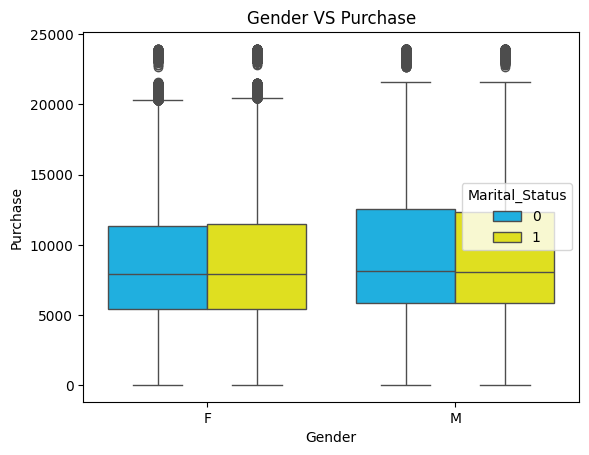

In [ ]:
sns.boxplot(data=data, x='Gender', y='Purchase', hue='Marital_Status', palette={0:'deepskyblue', 1:'yellow'}, fill=True)
plt.title('Gender VS Purchase')

Text(0.5, 1.0, 'Gender VS Product Category')

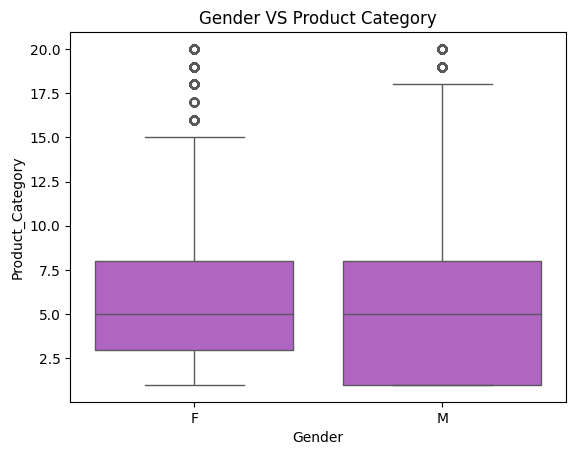

In [ ]:
sns.boxplot(data=data, x='Gender', y='Product_Category', color='mediumorchid')
plt.title('Gender VS Product Category')

Text(0.5, 1.0, 'Marital Status VS Purchase')

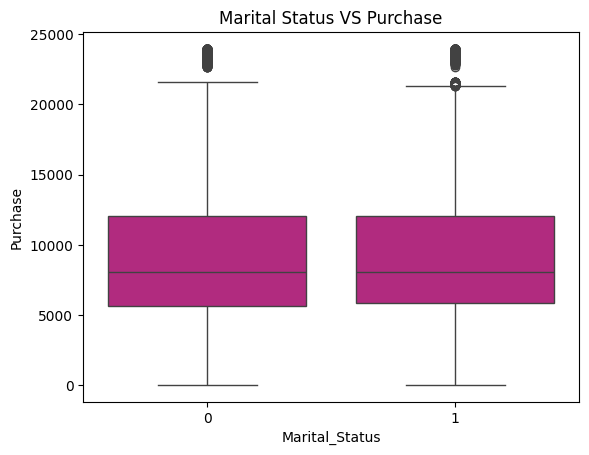

In [ ]:
sns.boxplot(data=data, x='Marital_Status', y='Purchase', color='mediumvioletred')
plt.title('Marital Status VS Purchase')

Text(0.5, 1.0, 'Occupation VS Purchase')

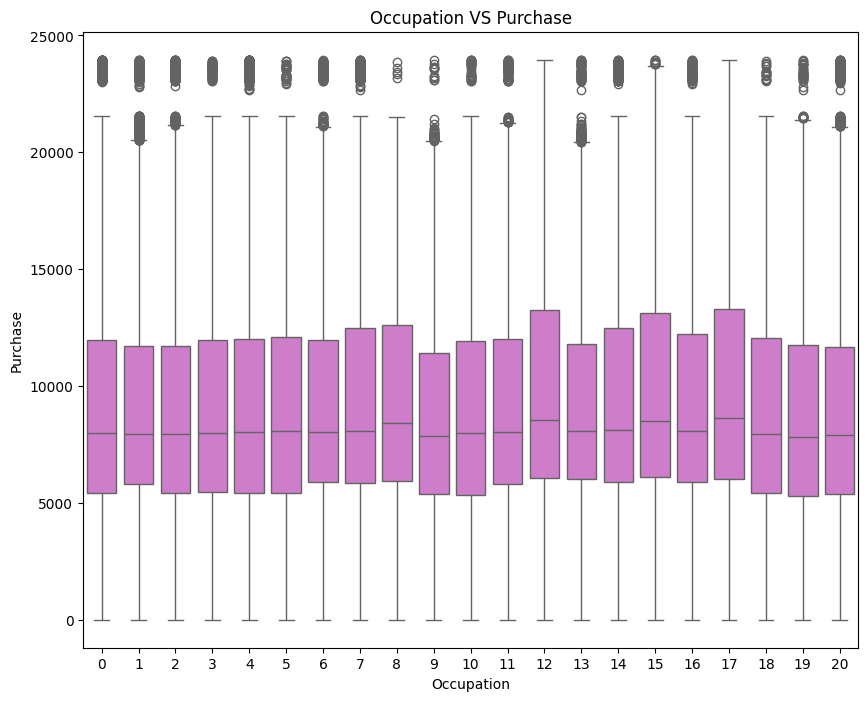

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Occupation', y='Purchase', color='orchid')
plt.title('Occupation VS Purchase')

## **Insights -**
### occupation 12 and 17 are showing highest number of purchases
## **Recommendation -**
### Walmart can focus on these type of occupation and target those people more to increase the sales

Text(0.5, 1.0, 'Purchase')

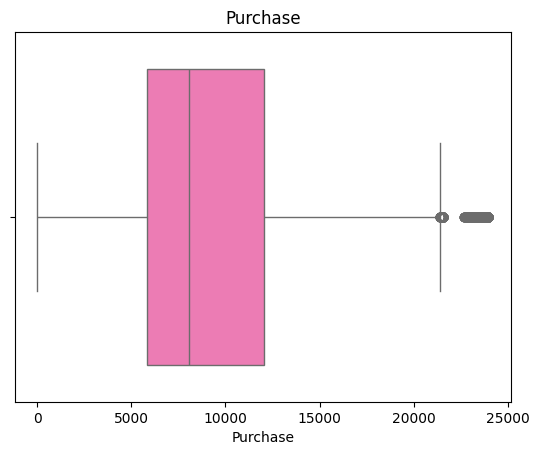

In [ ]:
sns.boxplot(data=data, x='Purchase', color='hotpink')
plt.title('Purchase')

## **Insights -**
### after 21000 (approx) purchase column have outliers

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64

### **2. Removing/Clipping the data between the 5 percentile and 95 percentile- to get rid of outliers**

In [ ]:
lower_percent = data['Purchase'].quantile(0.05)
upper_percent = data['Purchase'].quantile(0.95)
print(lower_percent, upper_percent)

1984.0 19336.0


In [ ]:
data.shape

(550068, 10)

In [ ]:
data = data[(data['Purchase']>=lower_percent) & (data['Purchase']<=upper_percent)]
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
...,...,...,...,...,...,...,...,...,...,...
545909,1006040,P00227142,M,26-35,6,B,2,0,5,3598
545910,1006040,P00184342,M,26-35,6,B,2,0,8,9855
545912,1006040,P00029842,M,26-35,6,B,2,0,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,0,5,7159


<Axes: xlabel='Purchase'>

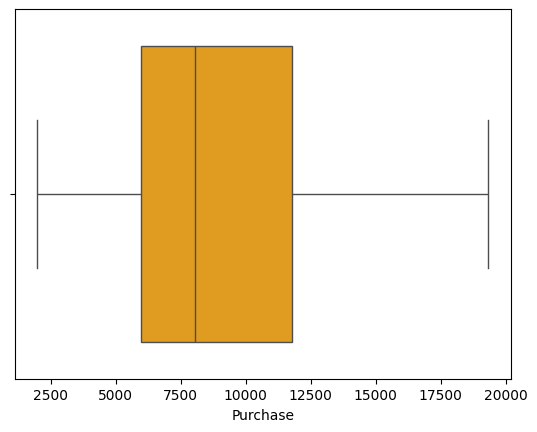

In [ ]:
sns.boxplot(data=data, x='Purchase', color='orange')

## **Insights -**
### 1. Inter quartile range is approx 6000 to 12000
### 2. all outliers have been clipped and we can see the 90% data of purchase is between 1984 and 19336

## **Data Exploration**

### **1. What products are different age groups buying**

In [ ]:
data.groupby('Product_Category').ngroups

16

In [ ]:
data.Product_Category.value_counts()

Product_Category
5     144019
1     126449
8     113506
2      23864
11     20806
3      20213
6      14103
4       8984
16      7863
15      4700
18      2886
10      2822
7       2463
14      1523
17       578
9        335
Name: count, dtype: int64

In [ ]:
top3_products = data['Product_Category'].value_counts().head(3)
df_top3_products = data.loc[data['Product_Category'].isin(top3_products.index)]
df_top3_products

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
...,...,...,...,...,...,...,...,...,...,...
545909,1006040,P00227142,M,26-35,6,B,2,0,5,3598
545910,1006040,P00184342,M,26-35,6,B,2,0,8,9855
545912,1006040,P00029842,M,26-35,6,B,2,0,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,0,5,7159


In [ ]:
bottom3_products = data['Product_Category'].value_counts().tail(3)
df_bottom3_products = data.loc[data['Product_Category'].isin(bottom3_products.index)]
df_bottom3_products

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
40,1000010,P00087242,F,36-45,1,B,4+,1,14,7947
250,1000045,P00210142,F,46-50,16,A,1,1,14,4325
387,1000062,P00087242,F,36-45,3,A,1,0,14,11279
1173,1000195,P00136442,M,26-35,12,B,4+,1,14,7670
1348,1000216,P00246942,M,46-50,13,B,1,0,17,10322
...,...,...,...,...,...,...,...,...,...,...
544115,1005768,P00154842,F,0-17,7,C,3,0,14,18385
544412,1005809,P00184242,M,26-35,7,C,4+,0,9,4546
544608,1005831,P00086842,M,26-35,1,A,2,1,14,14700
544762,1005854,P00246842,M,46-50,7,B,0,1,17,7984


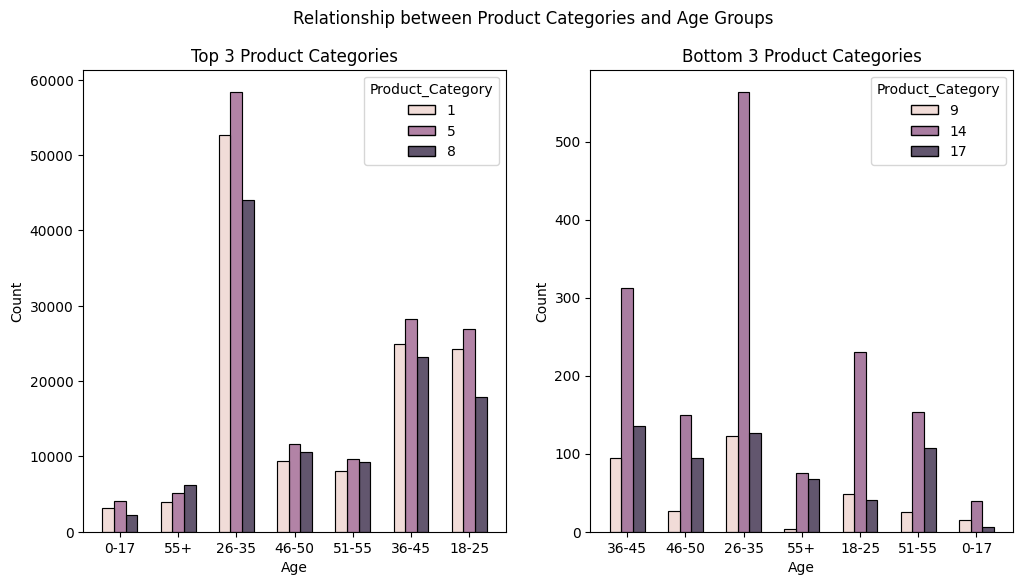

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df_top3_products, x='Age', hue='Product_Category', multiple='dodge', shrink=0.6, binwidth=0.5)
plt.title('Top 3 Product Categories')
plt.subplot(1,2,2)
sns.histplot(data=df_bottom3_products, x='Age', hue='Product_Category', multiple='dodge', shrink=0.6, binwidth=0.5)
plt.title('Bottom 3 Product Categories')
plt.suptitle('Relationship between Product Categories and Age Groups')
plt.show()

## **Insights top 3 product category-**
### Product Category 1, 5, 8 are top 3 categories, in which product 5 is most preferred by each age group except the 55+ age group while product 8 is 2nd most preferred category by all age group except early to middle teenage i.e. 0-17 age group for this particular age group product 1 is 2nd most preferred category
### all the product categories have extensive demand in 26-35 age groups

## **Insights bottom 3 product category-**
### product 9 is not that much demanding while 14 is still demanding by all age groups, product 17 is reducing for the early and middle teenage group i.e. 0-17

## **Recommendation -**
### we can increase the stock of product category 1, 5, 8 and 14 and ensure the stock expiry dates for product category 9 and 17 to make sure less wastage and less replacement of those products in walmart store
### Walmart can increase the sales by introducing the new products to the 26-35 age group people, as they are the most active customers for many product categories

### **2. Multivariate Analysis - relationship between Age, Marital Status and Amount spent**

<Axes: xlabel='Age', ylabel='Purchase'>

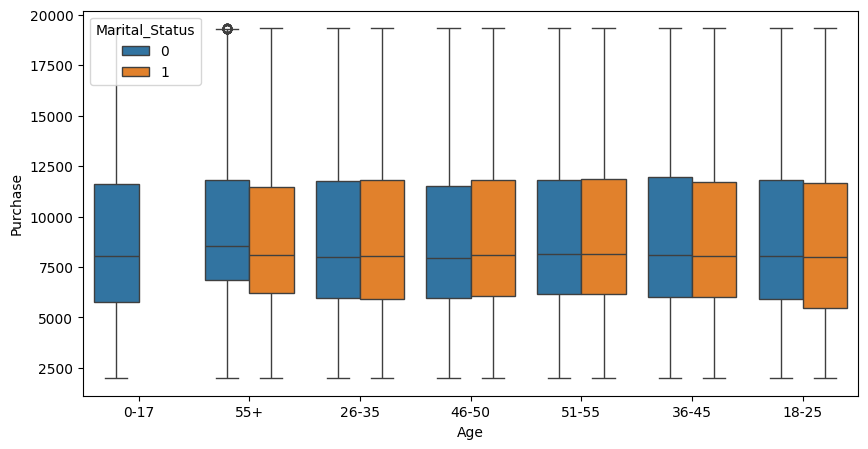

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Age', y='Purchase', hue='Marital_Status')

## **Insights -**
### Most of the purchases are made by marital status '0' for all age groups, marital status '1' are not showing purchase interest in early and middle teenage group i.e. 0-17

### **3. Checking for the preferred product categories for different genders**

Text(0.5, 1.0, 'Bottom 3 products')

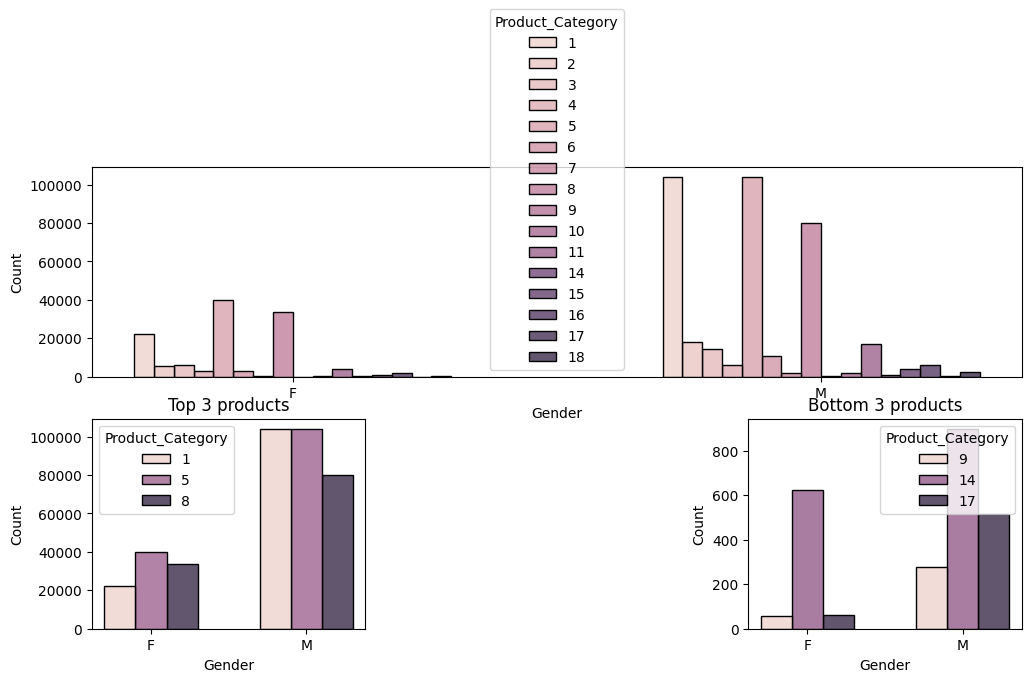

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(data=data, x='Gender', hue='Product_Category', multiple='dodge', shrink=0.6, binwidth=0.5)
plt.subplot(2,3,4)
sns.histplot(data=df_top3_products, x='Gender', hue='Product_Category', multiple='dodge', shrink=0.6, binwidth=0.5)
plt.title("Top 3 products")
plt.subplot(2,3,6)
sns.histplot(data=df_bottom3_products, x='Gender', hue='Product_Category', multiple='dodge', shrink=0.6, binwidth=0.5)
plt.title("Bottom 3 products")

## **Insights -**
### 1. Most of the users are males
### 2. Highest selling product category is 1 and 5 in males while in females product category 5 is highest selling followed by product category 8
## **Recommendation -**
### Wallmart can focus on price and customer feedback to improve the sales for lowest selling product categories like 7 category in females and 9 in males

## **Gender affect the amount spent**

### **1. confidence interval and CLT for 3 different sample sizes**

***Central Limit Theorem states that, if we take sample (of any size, here 300, 3000, 30000 will be taken below) from the population and plot the sample mean then will get the gaussian distribution***

The mean for sample size 300, 3000, 30000 for male : [9283.037388888888, 9253.36057222222, 9236.25326]
The standard deviation for sample size 300, 3000, 30000 for male : [133.55437567935496, 48.100062339416624, 12.806461382159526]
The mean for sample size 300, 3000, 30000 for female : [8710.863055555556, 8668.371166666668, 8676.915982777778]
The standard deviation for sample size 300, 3000, 30000 for female : [179.41608554800462, 52.45426056878929, 14.455744405332469]
The mean for each gender : [[9283.037388888888, 9253.36057222222, 9236.25326], [8710.863055555556, 8668.371166666668, 8676.915982777778]]
The standard deviation for each gender : [[133.55437567935496, 48.100062339416624, 12.806461382159526], [179.41608554800462, 52.45426056878929, 14.455744405332469]]


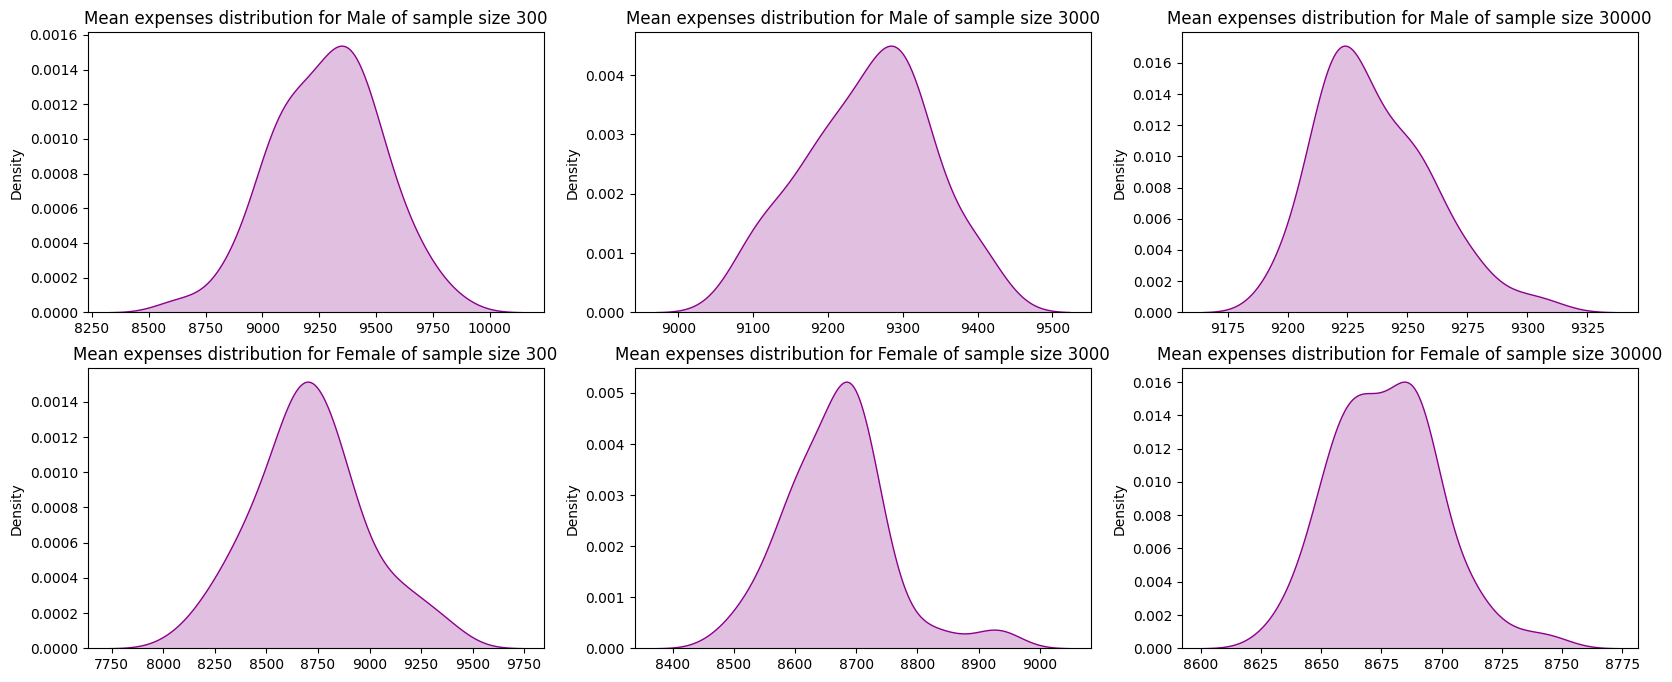

In [ ]:
# here taking the sample of 300, 3000, 30000 data points for both genders
# then creating the kde plots by taking 300, 3000, 30000 data points multiple times until we get gaussian distribution - 60 times
plt.figure(figsize=(20,8))
genders = ['M', 'F']
x=1
gen_mean = []
gen_std = []
for g in genders:
  sample_size = [300, 3000, 30000]
  means_res = []
  std_res = []
  for i in sample_size:
    sample_means = []
    sample_std = []
    for j in range(60):
      samp = data[data['Gender']==g]['Purchase'].sample(i).values
      avg = samp.mean()
      sample_means.append(avg)
      std = samp.std()
      sample_std.append(std)


    plt.subplot(2,3,x)
    if g=='M':
      sns.kdeplot(x=sample_means, color = 'darkmagenta', fill=True)
      plt.title(f'Mean expenses distribution for Male of sample size {i}')
    if g=='F':
      sns.kdeplot(x=sample_means, color = 'darkmagenta', fill=True)
      plt.title(f'Mean expenses distribution for Female of sample size {i}')
    x+=1

    means = np.mean(sample_means)
    means_res.append(means)
    sd = np.std(sample_std)
    std_res.append(sd)
  if g=='M':
    print(f"The mean for sample size 300, 3000, 30000 for male : {means_res}")
    print(f"The standard deviation for sample size 300, 3000, 30000 for male : {std_res}")
  if g=='F':
    print(f"The mean for sample size 300, 3000, 30000 for female : {means_res}")
    print(f"The standard deviation for sample size 300, 3000, 30000 for female : {std_res}")

  gen_mean.append(means_res)
  gen_std.append(std_res)
print(f"The mean for each gender : {gen_mean}")
print(f"The standard deviation for each gender : {gen_std}")

 ***After taking 60 times sample of 300, 3000, 30000 data points, we achived the gaussian distribution with the help of CLT***

In [ ]:
means_res, std_res

([8710.863055555556, 8668.371166666668, 8676.915982777778],
 [179.41608554800462, 52.45426056878929, 14.455744405332469])

In [ ]:
from scipy.stats import norm

In [ ]:
def ci_compute(CI):
    z_l=norm.ppf((1-CI)/2)
    z_r=norm.ppf((1+CI)/2)
    size = [300, 3000, 30000]
    ci = []
    for k in range(2):
        for s in range(len(gen_std[k])):
            se = gen_std[k][s]/np.sqrt(size[s])
            lower_bound, upper_bound = gen_mean[k][s]+(z_l*se), gen_mean[k][s]+(z_r*se)
            ci.append((lower_bound, upper_bound))

    return ci

In [ ]:
ci_compute(CI=0.95)

[(9267.924566264668, 9298.150211513108),
 (9251.639365225217, 9255.081779219223),
 (9236.108343909958, 9236.39817609004),
 (8690.560587268565, 8731.165523842546),
 (8666.494149550213, 8670.248183783122),
 (8676.752403636334, 8677.079561919223)]

## **Insights -**
### 95% confidence interval for mean expenses by 300 sample of male users is (9267.924566264668, 9298.150211513108) while female users is (9251.639365225217, 9255.081779219223)
### 95% confidence interval for mean expenses by 3000 sample of male users is (9236.108343909958, 9236.39817609004) while female users is (8690.560587268565, 8731.165523842546)
### 95% confidence interval for mean expenses by 30000 sample of males users is (8666.494149550213, 8670.248183783122) while female users is (8676.752403636334, 8677.079561919223)

### 1.With 95% confidence i can say that male spends more than females
### 2. As the sample size increases, width of confidence interval decreases and accuracy is more with large sample size
### 3. As the sample size increases, the shape of the distribution of means is narrow

The mean for sample size 300, 3000, 30000 for marital status 0 : [9102.25722222222, 9099.668522222222, 9094.680350555556]
The standard deviation for sample size 300, 3000, 30000 for marital status 0 : [153.23716665722338, 51.6417308571563, 14.946776122595296]
The mean for sample size 300, 3000, 30000 for marital status 1 : [9118.607944444446, 9111.312344444445, 9112.506975555558]
The standard deviation for sample size 300, 3000, 30000 for marital status 1 : [167.83868106043596, 47.39187838654419, 12.805183037783276]
The mean for each gender : [[9102.25722222222, 9099.668522222222, 9094.680350555556], [9118.607944444446, 9111.312344444445, 9112.506975555558]]
The standard deviation for each gender : [[153.23716665722338, 51.6417308571563, 14.946776122595296], [167.83868106043596, 47.39187838654419, 12.805183037783276]]


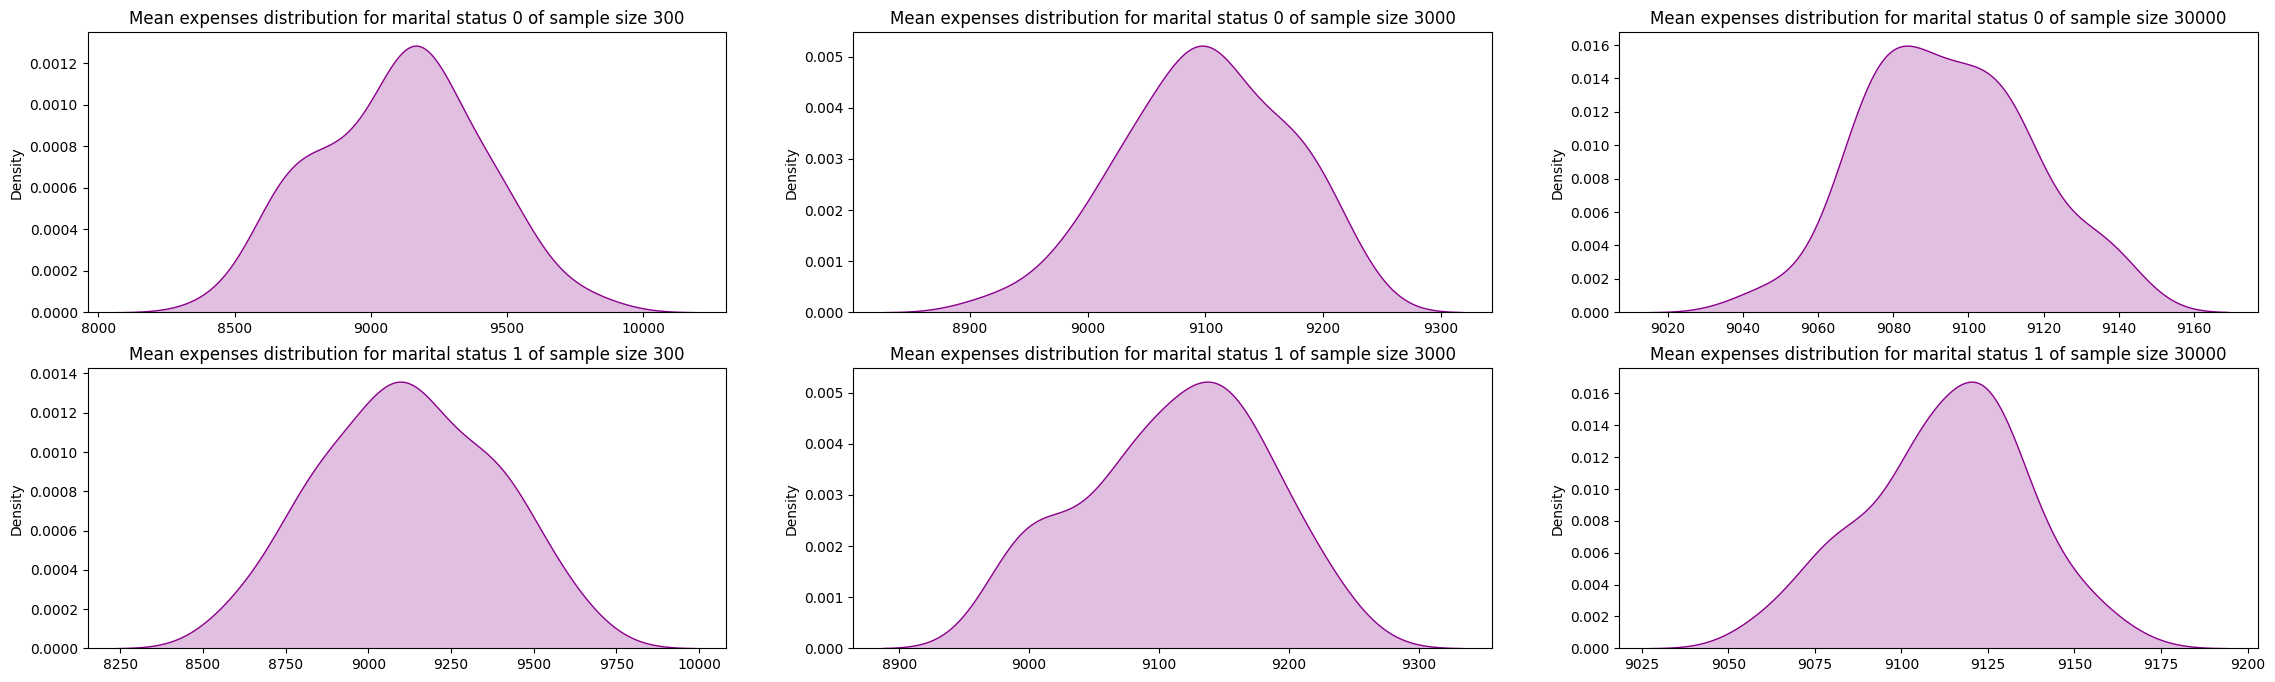

In [ ]:
# here taking the sample of 300, 3000, 30000 data points for both genders
# then creating the kde plots by taking 300, 3000, 30000 data points multiple times until we get gaussian distribution - 60 times
plt.figure(figsize=(28,8))
marital = [0, 1]
x=1
marital_mean = []
marital_std = []
for g in marital:
  sample_size = [300, 3000, 30000]
  means_res = []
  std_res = []
  for i in sample_size:
    sample_means = []
    sample_std = []
    for j in range(60):
      samp = data[data['Marital_Status']==g]['Purchase'].sample(i).values
      avg = samp.mean()
      sample_means.append(avg)
      std = samp.std()
      sample_std.append(std)


    plt.subplot(2,3,x)
    if g==0:
      sns.kdeplot(x=sample_means, color = 'darkmagenta', fill=True)
      plt.title(f'Mean expenses distribution for marital status 0 of sample size {i}')
    if g==1:
      sns.kdeplot(x=sample_means, color = 'darkmagenta', fill=True)
      plt.title(f'Mean expenses distribution for marital status 1 of sample size {i}')
    x+=1

    means = np.mean(sample_means)
    means_res.append(means)
    sd = np.std(sample_std)
    std_res.append(sd)
  if g==0:
    print(f"The mean for sample size 300, 3000, 30000 for marital status 0 : {means_res}")
    print(f"The standard deviation for sample size 300, 3000, 30000 for marital status 0 : {std_res}")
  if g==1:
    print(f"The mean for sample size 300, 3000, 30000 for marital status 1 : {means_res}")
    print(f"The standard deviation for sample size 300, 3000, 30000 for marital status 1 : {std_res}")

  marital_mean.append(means_res)
  marital_std.append(std_res)
print(f"The mean for each gender : {marital_mean}")
print(f"The standard deviation for each gender : {marital_std}")

In [ ]:
def ci_marital_compute(CI):
    z_l=norm.ppf((1-CI)/2)
    z_r=norm.ppf((1+CI)/2)
    size = [300, 3000, 30000]
    ci = []
    for k in range(2):
        for s in range(len(marital_std[k])):
            se = marital_std[k][s]/np.sqrt(size[s])
            lower_bound, upper_bound = marital_mean[k][s]+(z_l*se), marital_mean[k][s]+(z_r*se)
            ci.append((lower_bound, upper_bound))

    return ci

In [ ]:
ci_marital_compute(CI=0.95)

[(9084.917123050263, 9119.597321394178),
 (9097.820580573802, 9101.516463870643),
 (9094.511214969249, 9094.849486141864),
 (9099.61555873303, 9137.600330155861),
 (9109.616479019065, 9113.008209869824),
 (9112.362073931079, 9112.651877180037)]

## **Insights -**
### 95% confidence interval for mean expenses by 300 sample of marital status 0 is (9084.917123050263, 9119.597321394178) while marital status 1 is (9097.820580573802, 9101.516463870643)
### 95% confidence interval for mean expenses by 3000 sample of marital status 0 is (9094.511214969249, 9094.849486141864) while marital status 1 is (9099.61555873303, 9137.600330155861)
### 95% confidence interval for mean expenses by 30000 sample of marital status 0 is (9109.616479019065, 9113.008209869824) while marital status 1 is (9112.362073931079, 9112.651877180037)

### 1. Nothing can be inferred anything about the purchase based upon marital status as the values are overlapping for all sample sizes, so it could be possible is both the marital status means are lying in same interval and both marital status showing the same purchase behaviour
### 2. As the sample size increases, width of confidence interval decreases and accuracy is more with large sample size
### 3. As the sample size increases, the shape of the distribution of means is narrow

In [ ]:
population_mean_male = data[data['Gender']=='M'].Purchase.mean()
population_mean_female = data[data['Gender']=='F'].Purchase.mean()
print(f"Population mean for males : {population_mean_male}\n Population mean for females : {population_mean_female}")

Population mean for males : 9240.033313101256
 Population mean for females : 8678.295883292063


In [ ]:
population_mean_marital_0 = data[data['Marital_Status']==0].Purchase.mean()
population_mean_marital_1 = data[data['Marital_Status']==1].Purchase.mean()
print(f"Population mean for marital status 0 : {population_mean_marital_0}\n Population mean for marital status 1 : {population_mean_marital_1}")

Population mean for marital status 0 : 9093.61452809999
 Population mean for marital status 1 : 9111.040601169763


## **Recommendation -**
### 1. Walmart can target male customers for the products that costs around 9240 and female customers for the products that costs around 8678, as per the population mean calculated for each gender
### 2. Walmart can target marital status 0 customers for the products that costs around 9093 and marital status 1 customers for the products that costs around 9111, as per the population mean calculated for each marital status, but as per the analysis both marital status are showing equal behavior towards their purchase at walmart, walmart can introduce few surveys to know more about it.
### 3. walmart can gradually increase the sales of products with high cost for both genders and intriduce the new ad to promote more female customers